In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime as dt
import importlib

import aux_funcs as aux

# Read data files

## Training data

In [2]:
train_df = aux.read_file('train.csv')

train.csv read in 12.7 s
Mem. usage decreased to 289.19 Mb (53.1% reduction)


In [3]:
#log meter reading
train_df['log_meter_reading'] = np.log(1+train_df['meter_reading'])

In [4]:
# expand time stamp
train_df = aux.convert_timestamp(train_df)
train_df = aux.split_timestamp(train_df)

In [5]:
train_df.head()

,building_id,meter,timestamp,meter_reading,log_meter_reading,hour,day,year,weeknumber,weekday,month
0,0,0,2016-01-01,0.0,0.0,0,1,2016,53,4,1
1,1,0,2016-01-01,0.0,0.0,0,1,2016,53,4,1
2,2,0,2016-01-01,0.0,0.0,0,1,2016,53,4,1
3,3,0,2016-01-01,0.0,0.0,0,1,2016,53,4,1
4,4,0,2016-01-01,0.0,0.0,0,1,2016,53,4,1


## Building data

In [7]:
# building table
building_df = aux.read_file('building_metadata.csv')

building_metadata.csv read in 0.1 s
Mem. usage decreased to  0.03 Mb (60.3% reduction)


In [8]:
building_df['log_square_feet'] = np.log(building_df['square_feet'])

In [9]:
building_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,log_square_feet
0,0,0,Education,7432,2008.0,NaN,8.913550
1,0,1,Education,2720,2004.0,NaN,7.908387
2,0,2,Education,5376,1991.0,NaN,8.589700
3,0,3,Education,23685,2002.0,NaN,10.072597
4,0,4,Education,116607,1975.0,NaN,11.666565


## Weather test data

In [10]:
# weather(train) table
weather_train_df = aux.read_file('weather_train.csv')

weather_train.csv read in 0.3 s
Mem. usage decreased to  3.07 Mb (68.1% reduction)


In [11]:
weather_train_df = aux.convert_timestamp(weather_train_df)

In [12]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


In [13]:
importlib.reload(aux)

<module 'aux_funcs' from 'C:\\rob\\Kaggle\\ASHRAE\\aux_funcs.py'>

In [15]:
weather_null_data = aux.null_data_stats(weather_train_df)
weather_null_data

,total,percentage
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496
dew_temperature,113,0.080845
air_temperature,55,0.039350
timestamp,0,0.000000
site_id,0,0.000000


In [16]:
null_temp = weather_train_df.loc[weather_train_df['air_temperature'].isnull()]
null_temp.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
368,0,2016-01-16 08:00:00,NaN,NaN,NaN,0.0,NaN,180.0,1.500000
369,0,2016-01-16 09:00:00,NaN,2.0,NaN,0.0,NaN,190.0,1.500000
370,0,2016-01-16 10:00:00,NaN,2.0,NaN,0.0,NaN,190.0,1.500000
15763,1,2016-10-18 13:00:00,NaN,NaN,NaN,NaN,NaN,290.0,6.199219
22349,2,2016-07-19 02:00:00,NaN,NaN,NaN,86.0,NaN,NaN,NaN


## Join tables

In [17]:
tbw = train_df.join(building_df, on='building_id', rsuffix = 'r')

tbw.drop(columns=['year_built','floor_count','building_idr'],inplace=True)

In [18]:
tbw = pd.merge(tbw, weather_train_df,left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])

In [19]:
tbw.head()

,building_id,meter,timestamp,meter_reading,log_meter_reading,hour,day,year,weeknumber,weekday,...,primary_use,square_feet,log_square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0.0,0,1,2016,53,4,...,Education,7432,8.913550,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01,0.0,0.0,0,1,2016,53,4,...,Education,2720,7.908387,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01,0.0,0.0,0,1,2016,53,4,...,Education,5376,8.589700,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01,0.0,0.0,0,1,2016,53,4,...,Education,23685,10.072597,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01,0.0,0.0,0,1,2016,53,4,...,Education,116607,11.666565,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


# Tree of trees

In [20]:
use_list = np.unique(building_df['primary_use'])
meter_list = np.arange(0,4)
features_list=['weeknumber','weekday','hour','log_square_feet','air_temperature']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

out = []
dtrs = []
for use in use_list:
    for meter in meter_list:
        print('---------------------')
        print('Extracting data for: ', use, meter)
        print('')
        # extract by primary use and meter value
        sub_df = tbw[(tbw['primary_use']== use) & (tbw['meter']==meter)]
        
        X=sub_df[features_list]
        y=sub_df['log_meter_reading']
        
        #eliminate points with no temperature
        cond = ~X['air_temperature'].isnull() 
        print(sum(cond),'datapoints')
        X = X[cond]
        y = y[cond]
        
        if len(y)==0:
            continue        
        
        print('Train-test split...')
        # train-test split
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75, random_state=42)
        print('X_train shape: ', X_train.shape)
        print('X_test shape: ', X_test.shape)

        # fit
        print('Fitting model...')
        t0 = time()
        dtr = DecisionTreeRegressor(min_samples_leaf = 1, min_samples_split=2)
        dtr.fit(X_train,y_train)
        print('Fit in {:.1f}s'.format(time()-t0) )
        
        print('Validating...')
        # predict
        pred = dtr.predict(X_test)
        
        # validate model
        R2 = r2_score(y_test,pred)
        mse = mean_squared_error(y_test,pred)
        print('R2 :', R2)
        print('MSE :', mse)
        
        # attach results
        out.append([use, meter, len(y), R2, mse])
        dtrs.append(dtr)
        print('Done')
        print('')


---------------------
Extracting data for:  Education 0

4577522 datapoints
Train-test split...
X_train shape:  (3433141, 5)
X_test shape:  (1144381, 5)
Fitting model...
Fit in 22.3s
Validating...
R2 : 0.9731690016048645
MSE : 0.08379032608560538
Done

---------------------
Extracting data for:  Education 1

1812418 datapoints
Train-test split...
X_train shape:  (1359313, 5)
X_test shape:  (453105, 5)
Fitting model...
Fit in 7.7s
Validating...
R2 : 0.9013566352608173
MSE : 0.6665589260750389
Done

---------------------
Extracting data for:  Education 2

1125729 datapoints
Train-test split...
X_train shape:  (844296, 5)
X_test shape:  (281433, 5)
Fitting model...
Fit in 4.5s
Validating...
R2 : 0.8301090029694634
MSE : 1.2393514747167962
Done

---------------------
Extracting data for:  Education 3

606440 datapoints
Train-test split...
X_train shape:  (454830, 5)
X_test shape:  (151610, 5)
Fitting model...
Fit in 1.7s
Validating...
R2 : 0.8451391612565354
MSE : 1.0093604479389955
Done



17564 datapoints
Train-test split...
X_train shape:  (13173, 5)
X_test shape:  (4391, 5)
Fitting model...
Fit in 0.1s
Validating...
R2 : 0.8265604710607051
MSE : 0.47366744959831253
Done

---------------------
Extracting data for:  Parking 3

0 datapoints
---------------------
Extracting data for:  Public services 0

1317166 datapoints
Train-test split...
X_train shape:  (987874, 5)
X_test shape:  (329292, 5)
Fitting model...
Fit in 5.6s
Validating...
R2 : 0.9693770712565559
MSE : 0.05033670508201948
Done

---------------------
Extracting data for:  Public services 1

179273 datapoints
Train-test split...
X_train shape:  (134454, 5)
X_test shape:  (44819, 5)
Fitting model...
Fit in 0.5s
Validating...
R2 : 0.8483586134966213
MSE : 0.8878878336668042
Done

---------------------
Extracting data for:  Public services 2

82960 datapoints
Train-test split...
X_train shape:  (62220, 5)
X_test shape:  (20740, 5)
Fitting model...
Fit in 0.2s
Validating...
R2 : 0.8609437056127942
MSE : 0.8941422

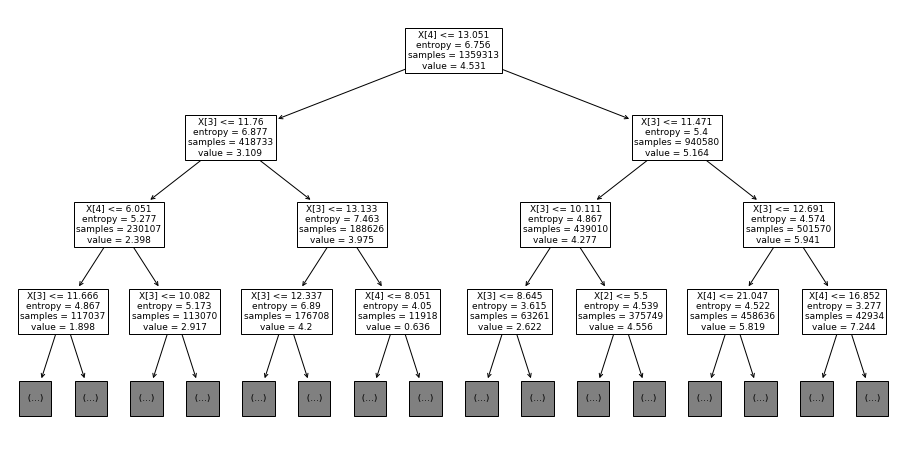

In [26]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(16,8))
plot_tree(dtrs[1],max_depth=3, fontsize=9)
plt.show()

In [27]:
# gather results into dataframe
res =pd.DataFrame(out,columns=['use','meter','n_data','R2','mse'])
res.head()

,use,meter,n_data,R2,mse
0,Education,0,4577522,0.973169,0.083790
1,Education,1,1812418,0.901357,0.666559
2,Education,2,1125729,0.830109,1.239351
3,Education,3,606440,0.845139,1.009360
4,Entertainment/public assembly,0,1505695,0.973650,0.085087


In [28]:
import pickle
dbfile = open('tree_of_trees_191023.pkl','ab')

pickle.dump(dtrs, dbfile)

dbfile.close()

# Predictions

In [37]:
sample = aux.read_file('sample_submission.csv')

sample_submission.csv read in 8.9 s
Mem. usage decreased to 198.83 Mb (68.7% reduction)


In [38]:
sample.head()

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [39]:
sample.shape

(41697600, 2)

In [40]:
test = aux.read_file('test.csv')


test.csv read in 33.5 s
Mem. usage decreased to 596.49 Mb (53.1% reduction)


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [43]:
test = aux.convert_timestamp(test)
test = aux.split_timestamp(test)

In [44]:
test.shape

(41697600, 10)

In [45]:
test.tail()

,row_id,building_id,meter,timestamp,hour,day,year,weeknumber,weekday,month
41697595,41697595,1444,0,2018-05-09 07:00:00,7,9,2018,19,2,5
41697596,41697596,1445,0,2018-05-09 07:00:00,7,9,2018,19,2,5
41697597,41697597,1446,0,2018-05-09 07:00:00,7,9,2018,19,2,5
41697598,41697598,1447,0,2018-05-09 07:00:00,7,9,2018,19,2,5
41697599,41697599,1448,0,2018-05-09 07:00:00,7,9,2018,19,2,5


In [46]:
weather_test_df = aux.read_file('weather_test.csv')
weather_test_df.head()

weather_test.csv read in 0.5 s
Mem. usage decreased to  6.08 Mb (68.1% reduction)


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,0,2017-01-01 01:00:00,17.796875,2.0,12.796875,0.0,1022.0,130.0,3.099609
2,0,2017-01-01 02:00:00,16.093750,0.0,12.796875,0.0,1022.0,140.0,3.099609
3,0,2017-01-01 03:00:00,17.203125,0.0,13.296875,0.0,1022.0,140.0,3.099609
4,0,2017-01-01 04:00:00,16.703125,2.0,13.296875,0.0,1022.5,130.0,2.599609


In [48]:
wnull = aux.null_data_stats(weather_test_df)
wnull

,total,percentage
cloud_coverage,140448,50.658808
precip_depth_1_hr,95588,34.478057
sea_level_pressure,21265,7.670167
wind_direction,12370,4.461790
wind_speed,460,0.165919
dew_temperature,327,0.117947
air_temperature,104,0.037512
timestamp,0,0.000000
site_id,0,0.000000


In [50]:
miss_temp = weather_test_df[weather_test_df['air_temperature'].isnull()]
miss_temp.tail(10)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
261875,15,2017-03-19 19:00:00,NaN,NaN,NaN,NaN,NaN,320.0,6.699219
264032,15,2017-06-18 23:00:00,NaN,4.0,NaN,NaN,NaN,190.0,6.699219
270809,15,2018-04-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.898438
272463,15,2018-06-14 00:00:00,NaN,NaN,NaN,NaN,NaN,300.0,7.699219
272464,15,2018-06-14 01:00:00,NaN,NaN,NaN,NaN,NaN,270.0,6.199219
275104,15,2018-10-02 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.500000
275105,15,2018-10-02 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.099609
275106,15,2018-10-02 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.099609
276245,15,2018-11-20 04:00:00,NaN,NaN,NaN,3.0,NaN,0.0,0.000000
276248,15,2018-11-20 07:00:00,NaN,NaN,NaN,5.0,NaN,0.0,0.000000


In [58]:
from sklearn.impute import SimpleImputer

air_temperature = weather_test_df['air_temperature'].values
air_temperature = air_temperature.reshape(-1,1)

imputer = SimpleImputer(strategy='mean')
imputer.fit(air_temperature)

C:\Users\Roberto\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [60]:
np.nanmean(weather_test_df.air_temperature)

C:\Users\Roberto\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


inf

In [63]:
xx =weather_test_df[~weather_test_df['air_temperature'].isnull()]
xx.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,0,2017-01-01 01:00:00,17.796875,2.0,12.796875,0.0,1022.0,130.0,3.099609
2,0,2017-01-01 02:00:00,16.093750,0.0,12.796875,0.0,1022.0,140.0,3.099609
3,0,2017-01-01 03:00:00,17.203125,0.0,13.296875,0.0,1022.0,140.0,3.099609
4,0,2017-01-01 04:00:00,16.703125,2.0,13.296875,0.0,1022.5,130.0,2.599609


In [65]:
xx.isnull().sum()

site_id                    0
timestamp                  0
air_temperature            0
cloud_coverage        140352
dew_temperature          223
precip_depth_1_hr      95558
sea_level_pressure     21162
wind_direction         12315
wind_speed               414
dtype: int64

In [56]:
air_temperature = weather_test_df['air_temperature'].values
air_temperature.reshape(-1,1)

array([[17.8],
       [17.8],
       [16.1],
       ...,
       [ 2.8],
       [ 2.8],
       [ 3.3]], dtype=float16)

In [57]:
air_temperature

array([17.8, 17.8, 16.1, ...,  2.8,  2.8,  3.3], dtype=float16)